In [1]:
from sensray import PlanetModel
import numpy as np
import matplotlib.pyplot as plt

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'M1 - 1D Profiles'}, xlabel='Property Value', ylabel='Depth (km)'>)

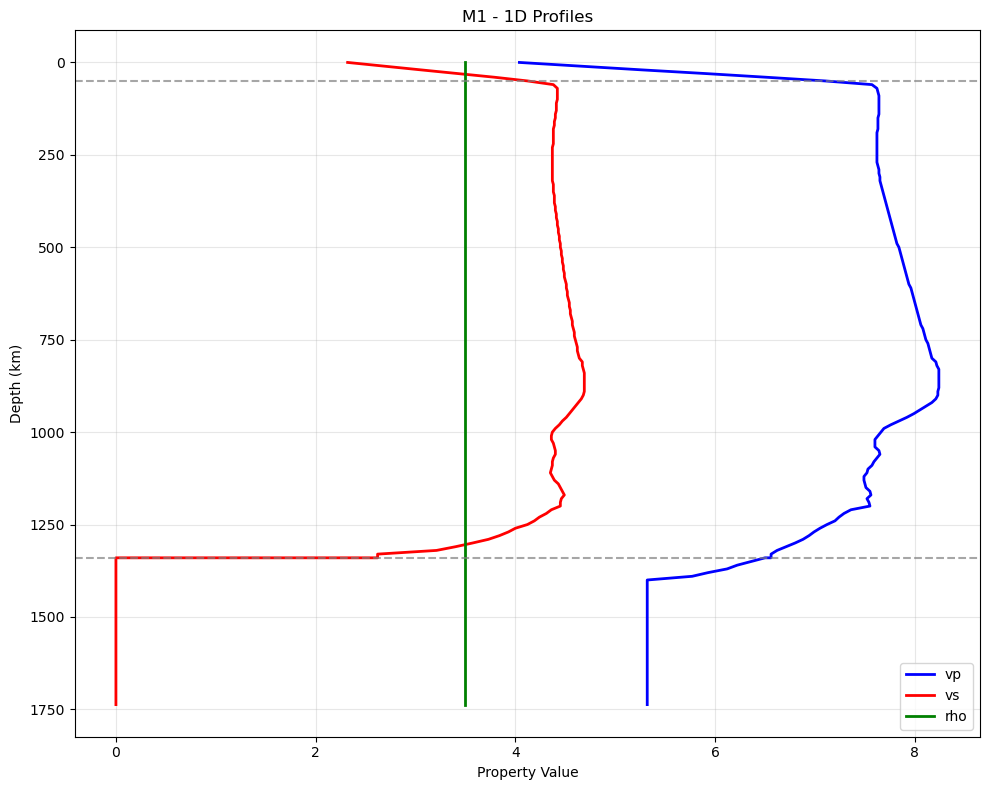

In [2]:
model = PlanetModel.from_standard_model("M1")

model.plot_profiles()

In [3]:
radii = np.linspace(0, model.radius, 50)
model.create_mesh(mesh_type="spherical", radii=radii)

Generated spherical mesh: 49 layers, 50 boundaries


In [4]:
test_f = lambda r: np.exp(-r/model.radius)

model.mesh.project_function_on_mesh(test_f, property_name="exp_neg_r")

In [5]:
model.mesh.mesh.cell_data["exp_neg_r"]

array([0.9848181 , 0.96774817, 0.94900006, 0.9301803 , 0.91158324,
       0.8932896 , 0.8753267 , 0.8577035 , 0.84042144, 0.8234784 ,
       0.8068705 , 0.79059285, 0.77464014, 0.7590067 , 0.7436866 ,
       0.7286742 , 0.7139635 , 0.6995487 , 0.6854241 , 0.67158395,
       0.6580227 , 0.64473474, 0.63171464, 0.61895716, 0.606457  ,
       0.594209  , 0.5822081 , 0.5704494 , 0.558928  , 0.54763913,
       0.5365781 , 0.5257404 , 0.51512146, 0.5047169 , 0.4945224 ,
       0.48453373, 0.47474673, 0.4651574 , 0.45576167, 0.44655567,
       0.43753558, 0.42869765, 0.4200382 , 0.41155362, 0.4032404 ,
       0.39509508, 0.38711426, 0.37929463, 0.3716329 ], dtype=float32)

In [6]:
rays = model.taupy_model.get_ray_paths(source_depth_in_km=10, distance_in_degree=120, phase_list=["P"])

Building obspy.taup model for '/home/adrian/PhD/masters/SensRay/sensray/models/M1.nd' ...
filename = /home/adrian/PhD/masters/SensRay/sensray/models/M1.nd
Done reading velocity model.
Radius of model . is 1737.1
Using parameters provided in TauP_config.ini (or defaults if not) to call SlownessModel...
Parameters are:
taup.create.min_delta_p = 0.1 sec / radian
taup.create.max_delta_p = 11.0 sec / radian
taup.create.max_depth_interval = 115.0 kilometers
taup.create.max_range_interval = 0.04363323129985824 degrees
taup.create.max_interp_error = 0.05 seconds
taup.create.allow_inner_core_s = True
Slow model  643 P layers,747 S layers
Done calculating Tau branches.
Done Saving /tmp/M1.npz
Method run is done, but not necessarily successful.


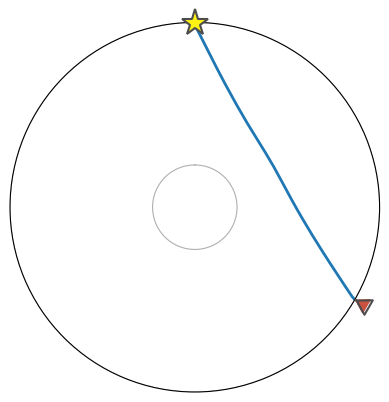

<PolarAxes: >

In [7]:
rays.plot_rays()

In [8]:
model.mesh.compute_ray_lengths_from_arrival(rays[0])

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 381.26156174,
       264.70937762, 185.26399691, 150.75943062, 132.63514644,
       121.15893621, 113.09203133, 107.2242574 , 102.62874193,
        98.85999864,  95.85573976,  93.35039552,  91.16304079,
        89.34801897,  87.78071306,  86.41084615,  85.20508516,
        84.18844291,  83.29453196,  82.55608317,  81.90416407,
        81.33174433,  80.80736524,  80.28345495,  78.58997197,
        64.12707778])